In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/dataset/코스피_최종.csv')
X = df[df.columns[6:]]
y = df['분식기업']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

### Ridge

In [3]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

rg_regressor = Ridge()

# 탐색할 하이퍼파라미터 그리드 정의
ridge_param_grid = {'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# KFold 객체 정의 (여기서는 5-fold를 사용)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 객체 정의
grid_search = GridSearchCV(estimator=rg_regressor, param_grid=ridge_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 훈련
grid_search.fit(X_train, y_train)
# 최적의 하이퍼파라미터 및 점수 출력
print("Best Parameter:", grid_search.best_params_)
print("Best CV Score:", -grid_search.best_score_)

Best Parameter: {'alpha': 1000}
Best CV Score: 0.01965888641501245


In [7]:
# 하이퍼 파라미터(alpha = 1000)적용
rg_regressor = Ridge(alpha=1000, random_state=42)
rg_regressor.fit(X_train, y_train)
rg_regressor.coef_
# hyper_rg_coef_values = rg_regressor.coef_
# new_row = pd.DataFrame([hyper_rg_coef_values], columns=rg_coef_df.columns)  # 새로운 행 데이터 생성
# rg_coef_df = rg_coef_df.append(new_row, ignore_index=True)
# rg_coef_df

array([-5.07881801e-04,  3.60854631e-04, -3.42349885e-04, -1.68845148e-05,
        8.48052121e-04,  1.63635880e-05,  1.73520989e-05, -3.82791074e-06,
       -2.02873019e-05,  1.18532417e-05,  9.05550410e-07, -1.00949123e-04,
       -3.05047758e-06,  8.99370429e-06,  3.24860121e-05, -2.56685854e-05,
       -2.11164686e-04, -1.22165796e-04,  9.73728051e-05,  3.06943303e-04,
        8.98289052e-04, -7.32628178e-03, -2.33383566e-04, -1.32490640e-05,
        7.00610048e-05, -4.80535960e-03, -4.26678067e-05,  4.10201615e-03,
       -4.72526072e-05,  4.07745802e-04, -1.18879347e-04, -1.39785653e-04,
       -9.64291433e-04, -9.33930491e-04, -1.99055090e-03, -1.07337122e-05,
       -3.70640622e-04,  3.38530093e-03, -1.97392152e-03, -8.45348354e-04,
       -4.99899968e-04])

### Lasso

In [9]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
 
lasso_regressor = Lasso(random_state=42)

lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])

# 탐색할 하이퍼파라미터 그리드 정의
lasso_param_grid = {'alpha': lasso_alpha}

# KFold 객체 정의 (여기서는 5-fold를 사용)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 객체 정의
grid_search = GridSearchCV(estimator=lasso_regressor, param_grid=lasso_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 훈련
grid_search.fit(X_train, y_train)
# 최적의 하이퍼파라미터 및 점수 출력
print("Best Parameter:", grid_search.best_params_)
print("Best CV Score:", -grid_search.best_score_)

Best Parameter: {'alpha': 0.0011111111111111111}
Best CV Score: 0.019631885030283146


In [12]:
# 규제 x
lasso_regressor = Lasso(random_state=42)
lasso_regressor.fit(X_train, y_train)
lasso_coef_values = lasso_regressor.coef_
lasso_coef_df = pd.DataFrame(lasso_coef_values.reshape(1, -1), columns=X_train.columns)
lasso_coef_df

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),ROE(세전계속사업이익)(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA,벤포드
0,-0.0,0.0,-0.0,-0.000004,0.0,-0.0,-0.0,-0.0,-0.0,0.000009,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0


In [14]:
# 하이퍼 파라미터(alpha = 0.1)적용
lasso_regressor = Lasso(alpha=0.0011111111111111111, random_state=42)
lasso_regressor.fit(X_train, y_train)

hyper_lasso_coef_values = lasso_regressor.coef_
new_row = pd.DataFrame([hyper_lasso_coef_values], columns=lasso_coef_df.columns)  # 새로운 행 데이터 생성

lasso_coef_df = pd.concat([lasso_coef_df, new_row], ignore_index=True)
lasso_coef_df

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),ROE(세전계속사업이익)(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA,벤포드
0,-0.000000,0.0,-0.000000,-0.000004,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000009,...,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
1,-0.000196,0.0,-0.000239,-0.000017,0.000841,0.000022,0.000017,-0.000004,-0.000026,0.000012,...,-0.000135,-0.0,-0.000249,-0.000625,-0.0,-0.0,0.0,-0.0,-0.0,-0.0


c:\Users\Master\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


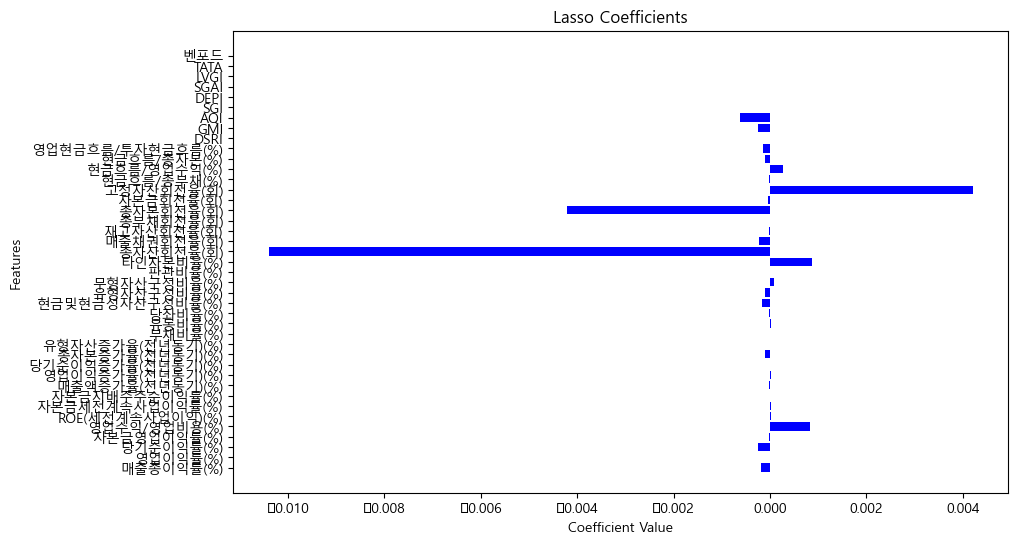

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# 라쏘 회귀 계수 추출
coef = lasso_regressor.coef_

# 특성 이름과 함께 계수를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(coef)), coef, color='b')
plt.yticks(range(len(coef)), X_train.columns)  # X_train의 컬럼 이름 사용
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Lasso Coefficients')
plt.show()